# This is my workbook in which i will be analysing the stuff.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
videos_stats = pd.read_csv('videos_stats.csv')
videos_stats.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,23/08/2022,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,24/08/2022,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,23/08/2022,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,23/08/2022,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,08/08/2022,tech,96513.0,5155.0,1855644.0


In [5]:
comments = pd.read_csv('comments.csv')
comments.head()

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34,2


In [19]:
keywords=[]
for key in videos_stats['Keyword']:
    if key in keywords:
        pass
    else:
        keywords.append(key)

In [88]:
grouped_data = videos_stats.groupby('Keyword')
keyword_data = {}
for keyword, group_data in grouped_data:
    likes = group_data['Likes'].fillna(0).tolist()
    comments = group_data['Comments'].fillna(0).tolist()
    views = group_data['Views'].fillna(0).tolist()
    keyword_data[keyword] = {
        'likes' : likes,
        'comments' : comments,
        'views' : views
    }


In [89]:
keywords_data_summed = {}

for keyword in keyword_data:
    
    likes_count = keyword_data[keyword]['likes']
    comments_count = keyword_data[keyword]['comments']
    views_count = keyword_data[keyword]['views']
    
    counted_likes = np.sum(likes_count)
    counted_comments = np.sum(comments_count)
    counted_views = np.sum(views_count)
    
    keywords_data_summed[keyword] = {
        'total_likes' : counted_likes,
        'total_comments' : counted_comments,
        'total_views' : counted_views
    }

print(keywords_data_summed['machine learning'])

{'total_likes': 1693347.0, 'total_comments': 59301.0, 'total_views': 63004908.0}


In [112]:
keyword_likes_list = [(keyword, likes['total_likes']) for keyword, likes in keywords_data_summed.items()]
sorted_keywords_likes_list = sorted(keyword_likes_list, key=lambda x: x[1], reverse=True)

sorted_keywords_likes_list

[('mrbeast', 105295718.0),
 ('animals', 28909480.0),
 ('google', 21202537.0),
 ('bed', 20842016.0),
 ('cubes', 15153060.0),
 ('music', 14452653.0),
 ('history', 13670533.0),
 ('marvel', 10518960.0),
 ('tutorial', 8386044.0),
 ('how-to', 7627111.0),
 ('mukbang', 6363299.0),
 ('apple', 4959314.0),
 ('physics', 4935045.0),
 ('food', 4560703.0),
 ('sports', 4435425.0),
 ('reaction', 3697989.0),
 ('interview', 3666347.0),
 ('business', 3455285.0),
 ('biology', 3124738.0),
 ('trolling', 3069352.0),
 ('minecraft', 3058978.0),
 ('lofi', 3010876.0),
 ('tech', 2905652.0),
 ('nintendo', 2139530.0),
 ('xbox', 1902183.0),
 ('asmr', 1830765.0),
 ('chess', 1693992.0),
 ('machine learning', 1693347.0),
 ('computer science', 1615850.0),
 ('sat', 1520509.0),
 ('education', 1495016.0),
 ('mathchemistry', 1407730.0),
 ('movies', 1384796.0),
 ('game development', 1308934.0),
 ('gaming', 1070583.0),
 ('data science', 858789.0),
 ('literature', 819969.0),
 ('finance', 516184.0),
 ('cnn', 441787.0),
 ('crypto

In [111]:
keywords_comments_lists = [(keyword, comments['total_comments']) for keyword, comments in keywords_data_summed.items()]
sorted_keywords_comments_list = sorted(keywords_comments_lists, key=lambda x: x[1], reverse=True)
sorted_keywords_comments_list

[('mrbeast', 4797224.0),
 ('google', 1019079.0),
 ('history', 1009501.0),
 ('animals', 831129.0),
 ('bed', 667962.0),
 ('music', 565291.0),
 ('marvel', 485034.0),
 ('tutorial', 396770.0),
 ('cnn', 378737.0),
 ('apple', 361992.0),
 ('cubes', 341654.0),
 ('mukbang', 335312.0),
 ('how-to', 333669.0),
 ('interview', 271412.0),
 ('food', 265114.0),
 ('physics', 222060.0),
 ('biology', 201745.0),
 ('sports', 187573.0),
 ('nintendo', 177347.0),
 ('reaction', 162336.0),
 ('movies', 155742.0),
 ('trolling', 152841.0),
 ('tech', 151304.0),
 ('minecraft', 142186.0),
 ('xbox', 140651.0),
 ('sat', 99347.0),
 ('education', 98723.0),
 ('lofi', 98397.0),
 ('business', 88339.0),
 ('mathchemistry', 80532.0),
 ('chess', 69199.0),
 ('game development', 68817.0),
 ('asmr', 61365.0),
 ('machine learning', 59301.0),
 ('gaming', 59207.0),
 ('computer science', 56197.0),
 ('news', 46154.0),
 ('finance', 42277.0),
 ('literature', 40473.0),
 ('crypto', 27331.0),
 ('data science', 25876.0)]

In [113]:
keywords_views_list = [(keyword, views['total_views']) for keyword, views in keywords_data_summed.items()]
sorted_keywords_views_list  = sorted(keywords_views_list, key = lambda x:x[1], reverse=True)
sorted_keywords_views_list

[('google', 4651423680.0),
 ('animals', 3599510515.0),
 ('mrbeast', 3338200199.0),
 ('bed', 2371302059.0),
 ('music', 1350785090.0),
 ('history', 752356506.0),
 ('cubes', 751936967.0),
 ('mukbang', 490714756.0),
 ('apple', 451371079.0),
 ('sports', 421459032.0),
 ('how-to', 374845676.0),
 ('business', 347345017.0),
 ('tutorial', 338051601.0),
 ('marvel', 330703978.0),
 ('food', 252115500.0),
 ('movies', 215488638.0),
 ('biology', 193715474.0),
 ('physics', 184619364.0),
 ('lofi', 163588861.0),
 ('interview', 148305593.0),
 ('tech', 92102733.0),
 ('minecraft', 90638537.0),
 ('asmr', 85330791.0),
 ('xbox', 83495065.0),
 ('nintendo', 79922028.0),
 ('trolling', 71007051.0),
 ('education', 64426388.0),
 ('machine learning', 63004908.0),
 ('chess', 62194816.0),
 ('computer science', 57214018.0),
 ('sat', 52227567.0),
 ('mathchemistry', 49921879.0),
 ('literature', 39698977.0),
 ('game development', 36234427.0),
 ('reaction', 31158623.0),
 ('cnn', 27712019.0),
 ('data science', 27238599.0),
 

In [123]:
top_ten_keywords_views = sorted_keywords_views_list[:10]
top_ten_keywords_likes = sorted_keywords_likes_list[:10]
top_ten_keywords_comments = sorted_keywords_comments_list[:10]

views_keywords = [item[0] for item in top_ten_keywords_views]
views_counts = [item[1]/ 1e9 for item in top_ten_keywords_views]

likes_keywords = [item[0] for item in top_ten_keywords_likes]
likes_counts = [item[1]/ 1e9 for item in top_ten_keywords_likes]

comments_keywords = [item[0] for item in top_ten_keywords_comments]
comments_counts = [item[1]/ 1e9 for item in top_ten_keywords_comments]

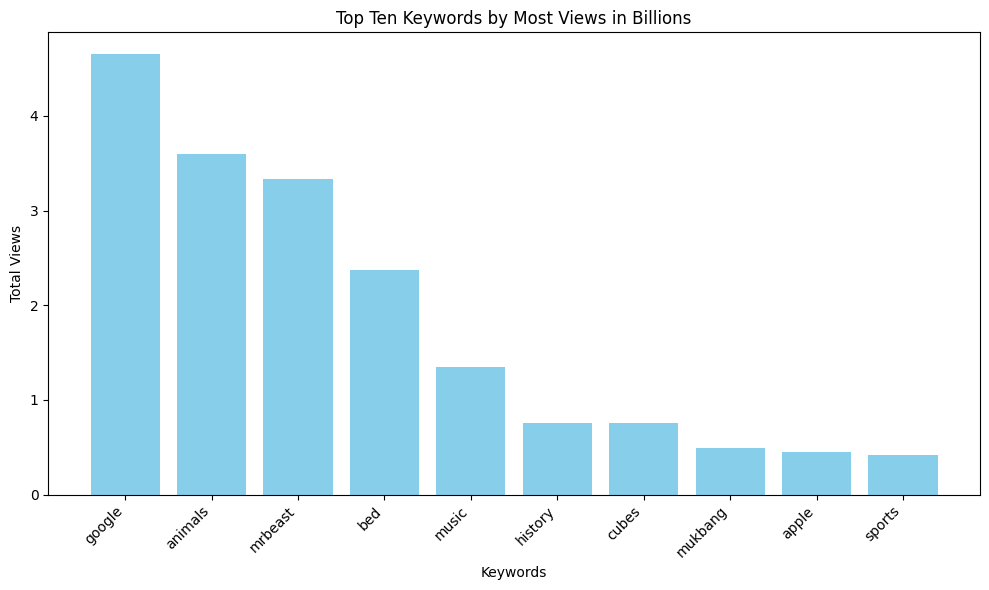

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(views_keywords, views_counts, color='skyblue')
plt.xlabel('Keywords')
plt.ylabel('Total Views')
plt.title('Top Ten Keywords by Most Views in Billions')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()